In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

clusters = ['Economy','Technology and Science', 'Entertainment','Lifestyle','Accident','Geopolitical','Intellectualism']

#--------detailed labels--------#

# data = pd.read_csv('./classified_data/regions/west_asia/classified_data/Malaysia_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/west_asia/classified_data/Philippines_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/west_asia/classified_data/Singapore_classification_output.csv')

# data = pd.read_csv('./classified_data/regions/africa/classified_data/Kenya_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/africa/classified_data/Nigeria_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/africa/classified_data/SouthAfrica_classification_output.csv')

# data = pd.read_csv('./classified_data/regions/north_america_australia/classified_data/Australia_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/north_america_australia/classified_data/Canada_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/north_america_australia/classified_data/USA_classification_output.csv')

# data = pd.read_csv('./classified_data/regions/europe/classified_data/Denmark_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/europe/classified_data/UK_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/europe/classified_data/Finland_classification_output.csv')

#--------general labels--------#
data = pd.read_csv('./classified_data/regions/africa/clustered_classified_data/Kenya_clustered_classified.csv')
data = pd.read_csv('./classified_data/regions/africa/clustered_classified_data/Nigeria_clustered_classified.csv')



df = data[['date','predicted_label','traffic','general_label']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('general_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

C:\Users\alkrd\AppData\Local\Temp\ipykernel_18892\382715983.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
general_label,
Economy,2000.000000
Geopolitical,4628.571429
Entertainment,5641.379310
Intellectualism,7476.923077
Lifestyle,7500.000000
Accident,7953.846154
Technology and Science,22909.090909


In [98]:
# topic_stats.plot(kind='bar', color='skyblue')

In [99]:
# df

C:\Users\alkrd\AppData\Local\Temp\ipykernel_18892\2486082901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


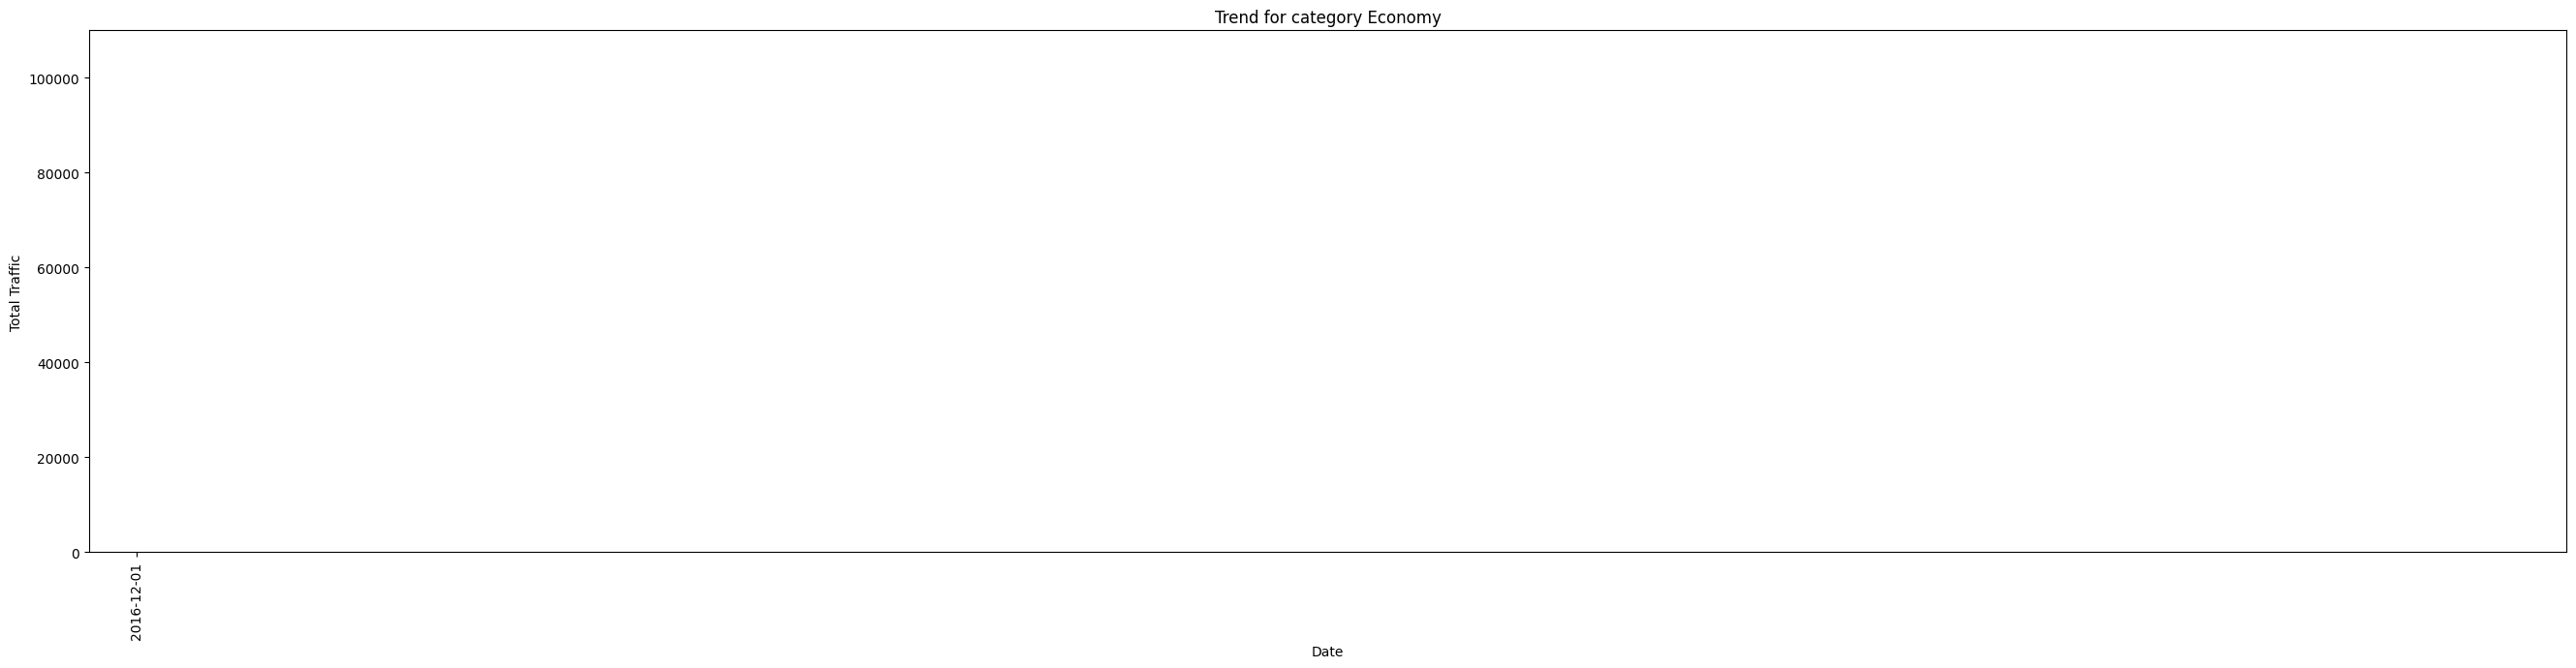

In [100]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()

category_time_distribution = df.groupby(['date', 'general_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category = clusters[0]
specific_category_data = category_time_distribution[category_time_distribution['general_label'] == specific_category]

plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for category {specific_category}")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()